In [1]:
import numpy as np
from scipy.interpolate import CubicSpline

from cam import Cam
from utils import linear

In [2]:
def interp(x, y):
    return CubicSpline(x, y, bc_type='natural')
    

r0 = 10.
points = 200
phases = 200
div = 5
maxiter = 100

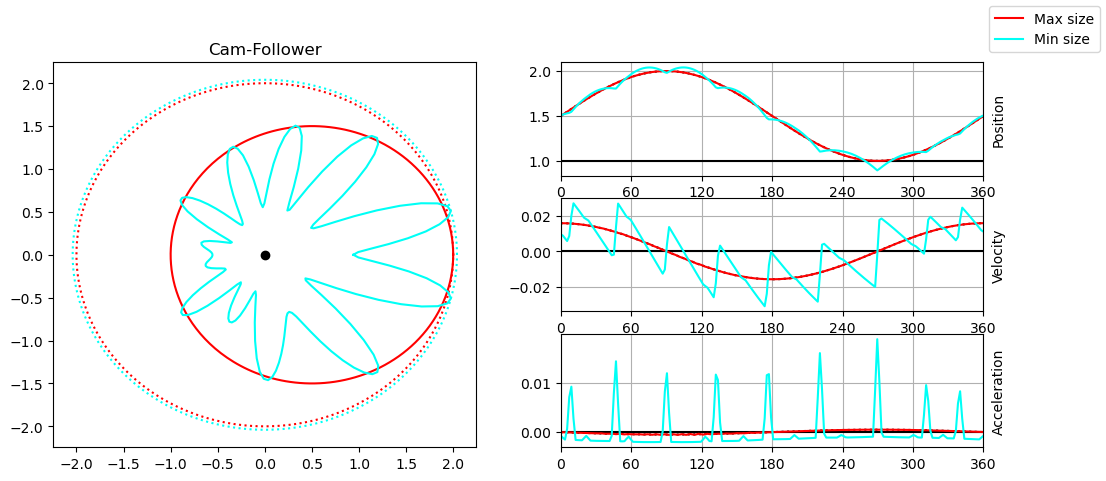

In [3]:
def path1(theta):
    freq = 1.0
    y = (np.sin(freq * theta) + 1.) / 2.
    return 1. * y


cam1 = Cam(points, 1., path1, constrained=False)
cam1_max = cam1.find_max_size(r0, phases)
cam1_min = cam1.find_min_size(div=div, maxiter=maxiter)
data1={'Max size': cam1_max, 'Min size': cam1_min}
cam1.plot(data1, save=True, filename='cam1.png')    

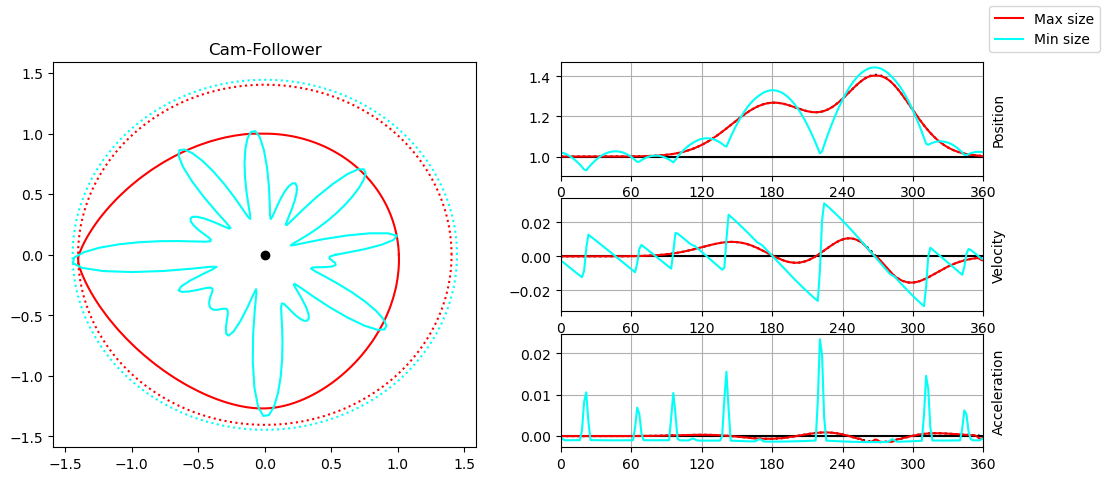

In [4]:
def path2(theta):
    sigma = 0.5
    phase = 3. * np.pi / 2.
    y1 = np.exp(-((theta - phase) ** 2.) / (2. * sigma ** 2.)) / (sigma * np.sqrt(2. * np.pi))
    phase -= np.pi / 2.
    sigma = 0.6
    y2 = 0.8 * np.exp(-((theta - phase) ** 2.) / (2. * sigma ** 2.)) / (sigma * np.sqrt(2. * np.pi))
    return 0.5 * (y1 + y2)


cam2 = Cam(points, 1., path2, constrained=False)
cam2_max = cam2.find_max_size(r0, phases)
cam2_min = cam2.find_min_size(div=div, maxiter=maxiter)
data2={'Max size': cam2_max, 'Min size': cam2_min}
cam2.plot(data2, save=True, filename='cam2.png')

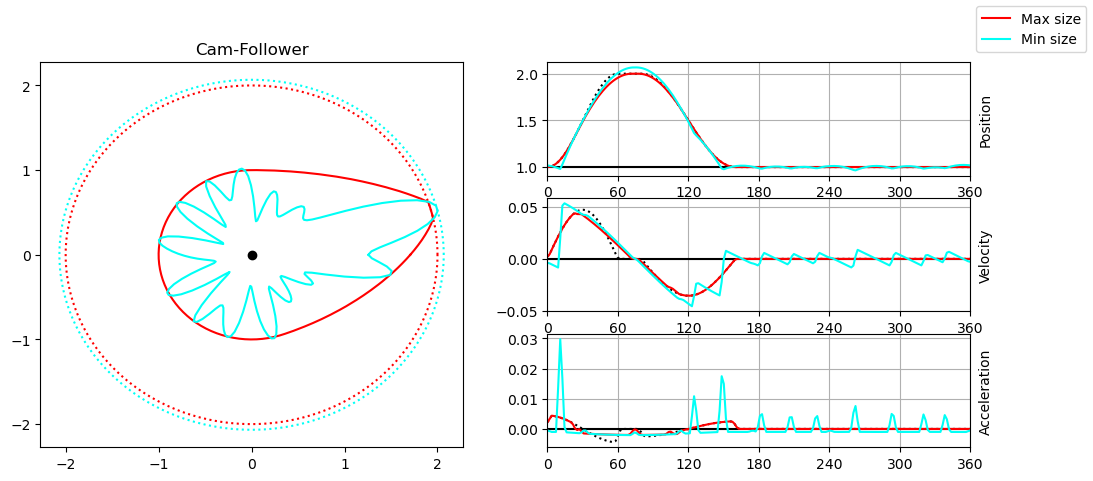

In [5]:
def path3(theta):
    t = theta * 180. / np.pi
    if t <= 60.:
        y = 0.5 * np.sin(linear(t, 0., -0.5 * np.pi, 60., 0.5 * np.pi)) + 0.5
    elif t <= 80.:
        y = 1.
    elif t <= 160.:
        y = 0.5 * np.sin(linear(t, 80., 0.5 * np.pi, 160., 1.5 * np.pi)) + 0.5
    else:
        y = 0.

    return 1. * y


cam3 = Cam(points, 1., path3, constrained=False)
cam3_max = cam3.find_max_size(r0, phases)
cam3_min = cam3.find_min_size(div=div, maxiter=maxiter)
data3={'Max size': cam3_max, 'Min size': cam3_min}
cam3.plot(data3, save=True, filename='cam3.png')

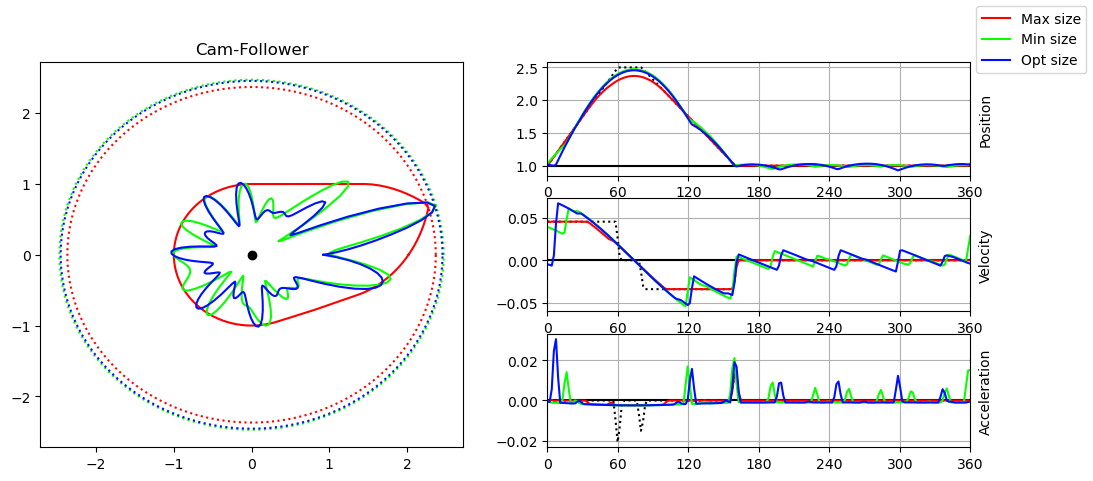

In [6]:
def path4(theta):
    t = theta * 180. / np.pi
    if t <= 60.:
        y = linear(t, 0., 0., 60., 1.)
    elif t <= 80.:
        y = 1.
    elif t <= 160.:
        y = linear(t, 80., 1., 160., 0.)
    else:
        y = 0.

    return 1.5 * y


def minimize4(x, theta, theta_aug):
    x[-1] = x[0]
    interpolator = interp(theta, x)
    x_aug = interpolator(theta_aug)
    grad1 = np.gradient(x_aug)
    grad2 = np.gradient(grad1)
    return np.sqrt(np.sum(grad2 ** 2.) / len(x_aug))


def constraint4(x, theta, theta_aug):
    x[-1] = x[0]
    interpolator = interp(theta, x)
    x_aug = interpolator(theta_aug)
    return np.sqrt(np.sum(cam4.verify(x_aug, cam4.points) ** 2.) / cam4.points)


constraints4 = [{'fun': constraint4, 'lb': 0., 'ub': 1e-2}]

cam4 = Cam(points, 1., path4, constrained=False)
cam4_max = cam4.find_max_size(r0, phases)
cam4_min = cam4.find_min_size(div=div, maxiter=maxiter)
cam4_opt = cam4.optimize(minimize4, constraints4, div=div, interp=interp, maxiter=maxiter)
data4={'Max size': cam4_max, 'Min size': cam4_min, 'Opt size': cam4_opt}
cam4.plot(data4, save=True, filename='cam4.png')